In [1]:
import numpy as np
from scipy.special import sph_harm
import pyvista as pv
# Switch off interactive mode
pv.set_jupyter_backend('static')
pv.start_xvfb()

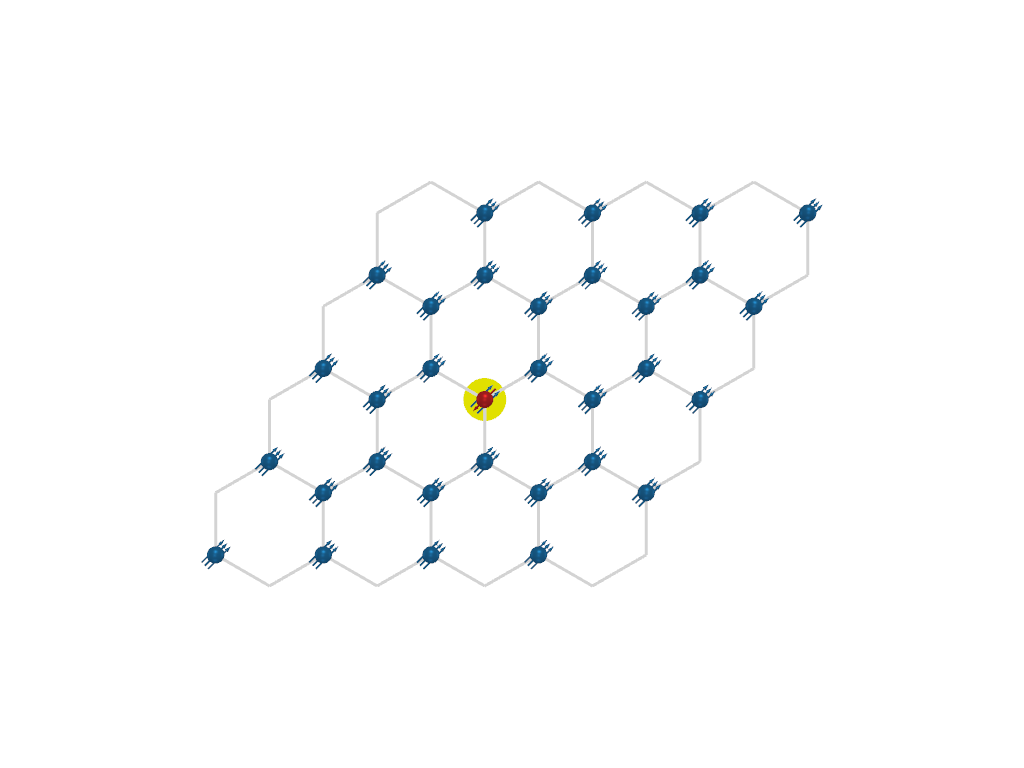

In [2]:
pl = pv.Plotter()

# unit cell
scale = 5
a = np.array([1, 0])*scale
b = np.array([1/2, np.sqrt(3)/2])*scale

# basis inside unit cell
wycoff = np.array([(a + b)/3,
                   2*(a + b)/3])            
# arrow positions
d = 0.15
offsets = [[+d, -d],
            [0, 0],
            [-d, +d]]

# colors etc.
spherecolor = 'tab:blue'
arrowcolor = 'tab:blue'
style = dict(lighting=True, diffuse=0.25, specular=0.75, specular_power=15, ambient=0.5)

# put exciton at this lattice index
ex_ind = 1

def arrow(x0, y0, off, flip=1):
    arrow =pv.Arrow(start=(x0 + flip*(-0.5 + off[0]), y0 + flip*(-0.5 + off[1]), 0.0),
                    direction=(flip*1.0, flip*1.0, 0),
                    tip_length=0.2,
                    tip_radius=0.06,
                    shaft_radius=0.03,
                    scale=1.5,
                    )
    return arrow

def cond(i, j, k, n):
    c = i == 3 and j == 3 and k == 1 and n == 1
    return not c

for i in range(4):
    for j in range(4):
        x0, y0 = i*a + j*b
        
        hexagon = pv.Polygon(center=(0, 0, 0.0), radius=scale/np.sqrt(3), n_sides=6, fill=False)
        hexagon.translate((x0 + a[0], y0 + 2*b[1]/3, 0), inplace=True)
        pl.add_mesh(hexagon, color='lightgray',  show_edges=True, line_width=3)

        for k in range(2):
            x0 += wycoff[k, 0]
            y0 += wycoff[k, 1]
            sphere = pv.Sphere(center=(x0, y0, 0.0), radius=0.4, theta_resolution=60, phi_resolution=60)

            if (i == ex_ind and j == ex_ind and k == 1):
                pl.add_mesh(sphere, color='tab:red', **style)
                disk = pv.Disc(center=(x0, y0, 0.0), inner=0, outer=1., c_res=60)
                pl.add_mesh(disk, color='yellow', **style)
            else:
                pl.add_mesh(sphere, color=spherecolor, **style)
                

            for n in range(3):
                cond = not (i == ex_ind and j == ex_ind and k == 1 and n == 1)
                if cond:
                    pl.add_mesh(arrow(x0, y0, offsets[n]), color=arrowcolor, **style)
                else:
                    pl.add_mesh(arrow(x0, y0, offsets[n], flip=-1), color='tab:red', **style)

pl.set_background('white')
pl.camera_position = 'xy'

_ = pl.screenshot('ex_28_excitons.png', scale=5)
pl.show()

In [3]:
from PIL import Image

im = Image.open(r'ex_28_excitons.png')
im_rbg = im.convert('RGB')
im_rbg.save(r'ex_28_excitons.pdf')